## Adding all the imports

In [143]:
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))
from helpers.collect_data import get_data
from feature_engineering.feature_engineering import clean_data
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

## Getting the dataframe

In [144]:
df = get_data()
#df = clean_data(df)

Fetching data from Binance...


## Descriptive statistics

In [145]:
df.describe()

,timestamp,open,high,low,close,volume,sma_50,sma_200,ema_10,rsi,macd,macd_signal,macd_histogram,label
count,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,951.000000,801.000000,991.000000,987.000000,975.000000,967.000000,967.000000,1000.000000
mean,2025-04-09 20:09:30,80714.364050,80779.511260,80656.670130,80719.711830,54.823992,80807.570420,81060.899335,80735.691040,51.177827,39.590877,39.627016,-0.275787,0.301000
min,2025-04-09 11:50:00,76071.040000,76151.060000,76010.210000,76071.050000,1.770930,76281.685600,77021.952300,76182.855189,19.792138,-163.456730,-145.783836,-142.713851,0.000000
25%,2025-04-09 15:59:45,77676.087500,77730.667500,77603.940000,77690.990000,16.243178,77657.008800,79095.334500,77669.085832,42.925833,-40.733777,-37.733794,-17.746341,0.000000
50%,2025-04-09 20:09:30,82136.840000,82200.365000,82076.815000,82136.840000,29.597440,82245.269400,82248.049350,82165.586785,51.180818,5.261570,4.666493,-2.126188,0.000000
75%,2025-04-10 00:19:15,82510.272500,82557.705000,82465.157500,82510.272500,60.536675,82434.555500,82696.546750,82498.067617,59.300192,76.743290,78.617852,15.158317,1.000000
max,2025-04-10 04:29:00,83550.960000,83588.000000,83466.010000,83550.960000,881.306150,83302.029000,83068.274850,83416.015712,83.901351,778.606929,720.973315,252.293878,1.000000
std,NaN,2484.493209,2474.652626,2495.177747,2480.745849,84.321776,2410.676398,2143.052735,2466.434944,11.501398,133.755837,128.501567,34.814949,0.458922


#### Last 5 registers

In [146]:
df.tail()

,timestamp,open,high,low,close,volume,sma_50,sma_200,ema_10,rsi,macd,macd_signal,macd_histogram,label
995,2025-04-10 04:25:00,81796.60,81810.71,81782.60,81810.71,6.06185,81746.7388,82121.40390,81771.487831,57.045697,7.467143,1.138642,6.328502,0
996,2025-04-10 04:26:00,81810.71,81810.71,81787.24,81790.00,4.17732,81749.3532,82118.11560,81774.853680,53.876780,8.599072,2.630728,5.968345,0
997,2025-04-10 04:27:00,81789.99,81790.90,81728.01,81732.01,6.80249,81751.5934,82114.82540,81767.063920,46.146664,4.761933,3.056969,1.704964,0
998,2025-04-10 04:28:00,81732.01,81732.01,81682.33,81682.33,3.27425,81752.1454,82111.05700,81751.657753,40.752197,-2.261717,1.993232,-4.254948,0
999,2025-04-10 04:29:00,81682.34,81682.34,81640.74,81655.26,7.27526,81749.8106,82107.07275,81734.130889,38.136201,-9.898232,-0.385061,-9.513171,0


#### Correlation between variables

In [147]:
df.corr()

,timestamp,open,high,low,close,volume,sma_50,sma_200,ema_10,rsi,macd,macd_signal,macd_histogram,label
timestamp,1.000000,0.808744,0.802270,0.813377,0.807539,-0.182369,0.813820,0.849313,0.809170,-0.353468,-0.322168,-0.336907,-0.002763,-0.171520
open,0.808744,1.000000,0.999347,0.999605,0.999127,0.031721,0.981724,0.833173,0.998734,-0.171499,-0.068197,-0.059590,-0.034110,0.123197
high,0.802270,0.999347,1.000000,0.999064,0.999616,0.056969,0.978163,0.820016,0.997791,-0.156169,-0.052281,-0.045104,-0.025275,0.135277
low,0.813377,0.999605,0.999064,1.000000,0.999399,0.021844,0.983573,0.842260,0.998840,-0.171604,-0.078377,-0.070900,-0.032203,0.119831
close,0.807539,0.999127,0.999616,0.999399,1.000000,0.045373,0.980457,0.830290,0.998147,-0.158075,-0.063698,-0.057092,-0.025714,0.130470
volume,-0.182369,0.031721,0.056969,0.021844,0.045373,1.000000,-0.090331,-0.301600,0.008425,0.329661,0.529899,0.472205,0.303706,0.341167
sma_50,0.813820,0.981724,0.978163,0.983573,0.980457,-0.090331,1.000000,0.902858,0.987621,-0.310208,-0.265049,-0.245745,-0.114862,-0.035058
sma_200,0.849313,0.833173,0.820016,0.842260,0.830290,-0.301600,0.902858,1.000000,0.846158,-0.409579,-0.470128,-0.470526,-0.069597,-0.482028
ema_10,0.809170,0.998734,0.997791,0.998840,0.998147,0.008425,0.987621,0.846158,1.000000,-0.201918,-0.100341,-0.083273,-0.072398,0.095582
rsi,-0.353468,-0.171499,-0.156169,-0.171604,-0.158075,0.329661,-0.310208,-0.409579,-0.201918,1.000000,0.697959,0.597837,0.487037,0.553564


In [148]:
## Correlation with label
df.corrwith(df['label'])

timestamp        -0.171520
open              0.123197
high              0.135277
low               0.119831
close             0.130470
volume            0.341167
sma_50           -0.035058
sma_200          -0.482028
ema_10            0.095582
rsi               0.553564
macd              0.540973
macd_signal       0.518652
macd_histogram    0.181117
label             1.000000
dtype: float64

#### Covariance between variables

In [149]:
df.cov()

,timestamp,open,high,low,close,volume,sma_50,sma_200,ema_10,rsi,macd,macd_signal,macd_histogram,label
timestamp,3.003000e+26,3.481982e+16,3.440430e+16,3.516989e+16,3.471548e+16,-2.664824e+14,3.233231e+16,2.526765e+16,3.427383e+16,-6.953423e+13,-7.280871e+14,-7.254866e+14,-1.612260e+12,-1.364054e+12
open,3.481982e+16,6.172707e+06,6.144244e+06,6.196803e+06,6.158016e+06,6.645553e+03,5.513222e+06,3.283695e+06,6.054758e+06,-4.824025e+03,-2.197930e+04,-1.827405e+04,-2.834027e+03,1.404677e+02
high,3.440430e+16,6.144244e+06,6.123906e+06,6.168916e+06,6.136629e+06,1.188763e+04,5.464610e+06,3.215955e+06,6.023595e+06,-4.374379e+03,-1.677636e+04,-1.376824e+04,-2.090325e+03,1.536307e+02
low,3.516989e+16,6.196803e+06,6.168916e+06,6.225912e+06,6.186183e+06,4.595944e+03,5.550793e+06,3.329167e+06,6.081702e+06,-4.847600e+03,-2.537518e+04,-2.184512e+04,-2.688232e+03,1.372170e+02
close,3.471548e+16,6.158016e+06,6.136629e+06,6.186183e+06,6.154100e+06,9.491250e+03,5.494122e+06,3.260941e+06,6.041015e+06,-4.439080e+03,-2.049614e+04,-1.747722e+04,-2.132675e+03,1.485362e+02
volume,-2.664824e+14,6.645553e+03,1.188763e+04,4.595944e+03,9.491250e+03,7.110162e+03,-1.875710e+04,-5.966264e+04,1.759264e+03,3.215967e+02,6.044679e+03,5.191358e+03,9.046087e+02,1.320220e+01
sma_50,3.233231e+16,5.513222e+06,5.464610e+06,5.550793e+06,5.494122e+06,-1.875710e+04,5.811361e+06,3.766282e+06,5.572057e+06,-8.688778e+03,-8.639132e+04,-7.670939e+04,-9.681936e+03,-3.932864e+01
sma_200,2.526765e+16,3.283695e+06,3.215955e+06,3.329167e+06,3.260941e+06,-5.966264e+04,3.766282e+06,4.592675e+06,3.362092e+06,-1.044816e+04,-1.431516e+05,-1.378739e+05,-5.277677e+03,-5.006246e+02
ema_10,3.427383e+16,6.054758e+06,6.023595e+06,6.081702e+06,6.041015e+06,1.759264e+03,5.572057e+06,3.362092e+06,6.083301e+06,-5.699929e+03,-3.245144e+04,-2.562385e+04,-6.035646e+03,1.084673e+02
rsi,-6.953423e+13,-4.824025e+03,-4.374379e+03,-4.847600e+03,-4.439080e+03,3.215967e+02,-8.688778e+03,-1.044816e+04,-5.699929e+03,1.322821e+02,1.077150e+03,8.881557e+02,1.960314e+02,2.932694e+00


## Data Cleaning and Preparation

#### NaN values

In [150]:
df.isnull().sum()

timestamp           0
open                0
high                0
low                 0
close               0
volume              0
sma_50             49
sma_200           199
ema_10              9
rsi                13
macd               25
macd_signal        33
macd_histogram     33
label               0
dtype: int64

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       1000 non-null   datetime64[ns]
 1   open            1000 non-null   float64       
 2   high            1000 non-null   float64       
 3   low             1000 non-null   float64       
 4   close           1000 non-null   float64       
 5   volume          1000 non-null   float64       
 6   sma_50          951 non-null    float64       
 7   sma_200         801 non-null    float64       
 8   ema_10          991 non-null    float64       
 9   rsi             987 non-null    float64       
 10  macd            975 non-null    float64       
 11  macd_signal     967 non-null    float64       
 12  macd_histogram  967 non-null    float64       
 13  label           1000 non-null   int64         
dtypes: datetime64[ns](1), float64(12), int64(1)
memory usage:

<Axes: >

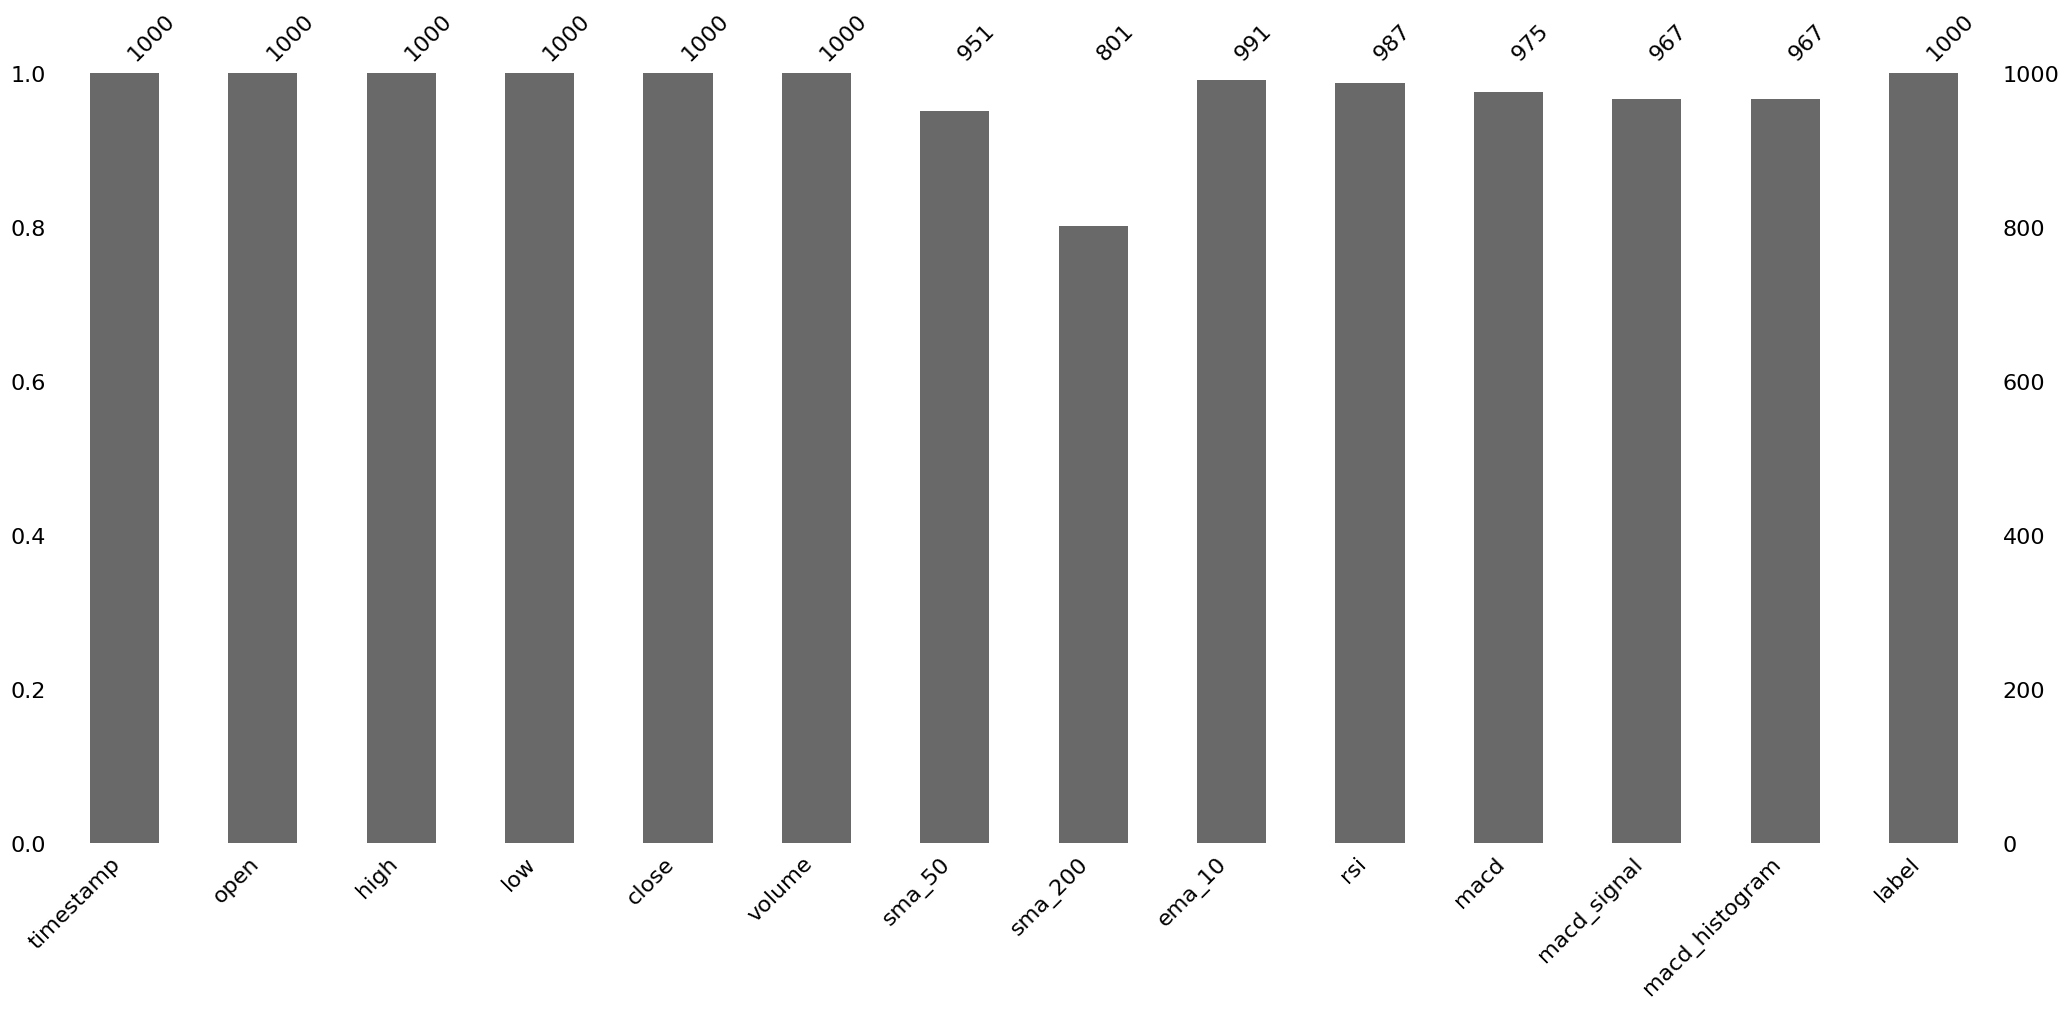

In [152]:
msno.bar(df)

<Axes: >

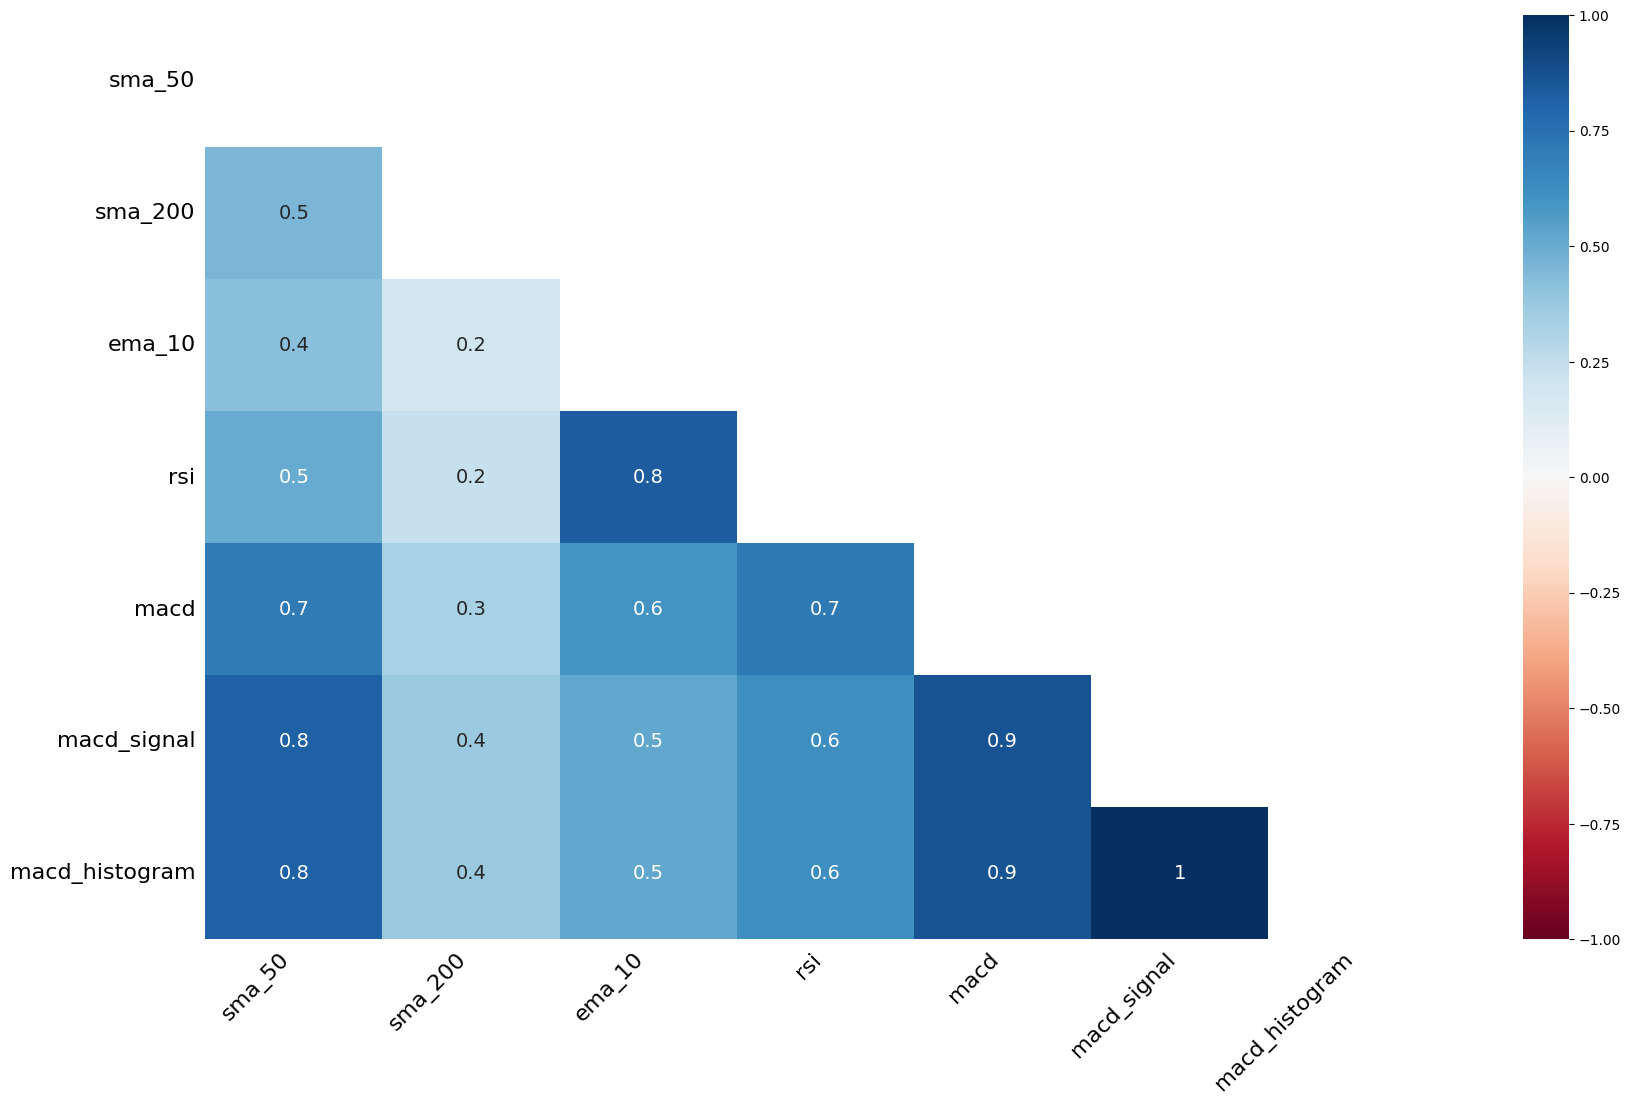

In [153]:
msno.heatmap(df)

##### The heatmap function shows that there are no strong correlations between missing values of different features. This is good; low correlations further indicate that the data are MAR.

<Axes: >

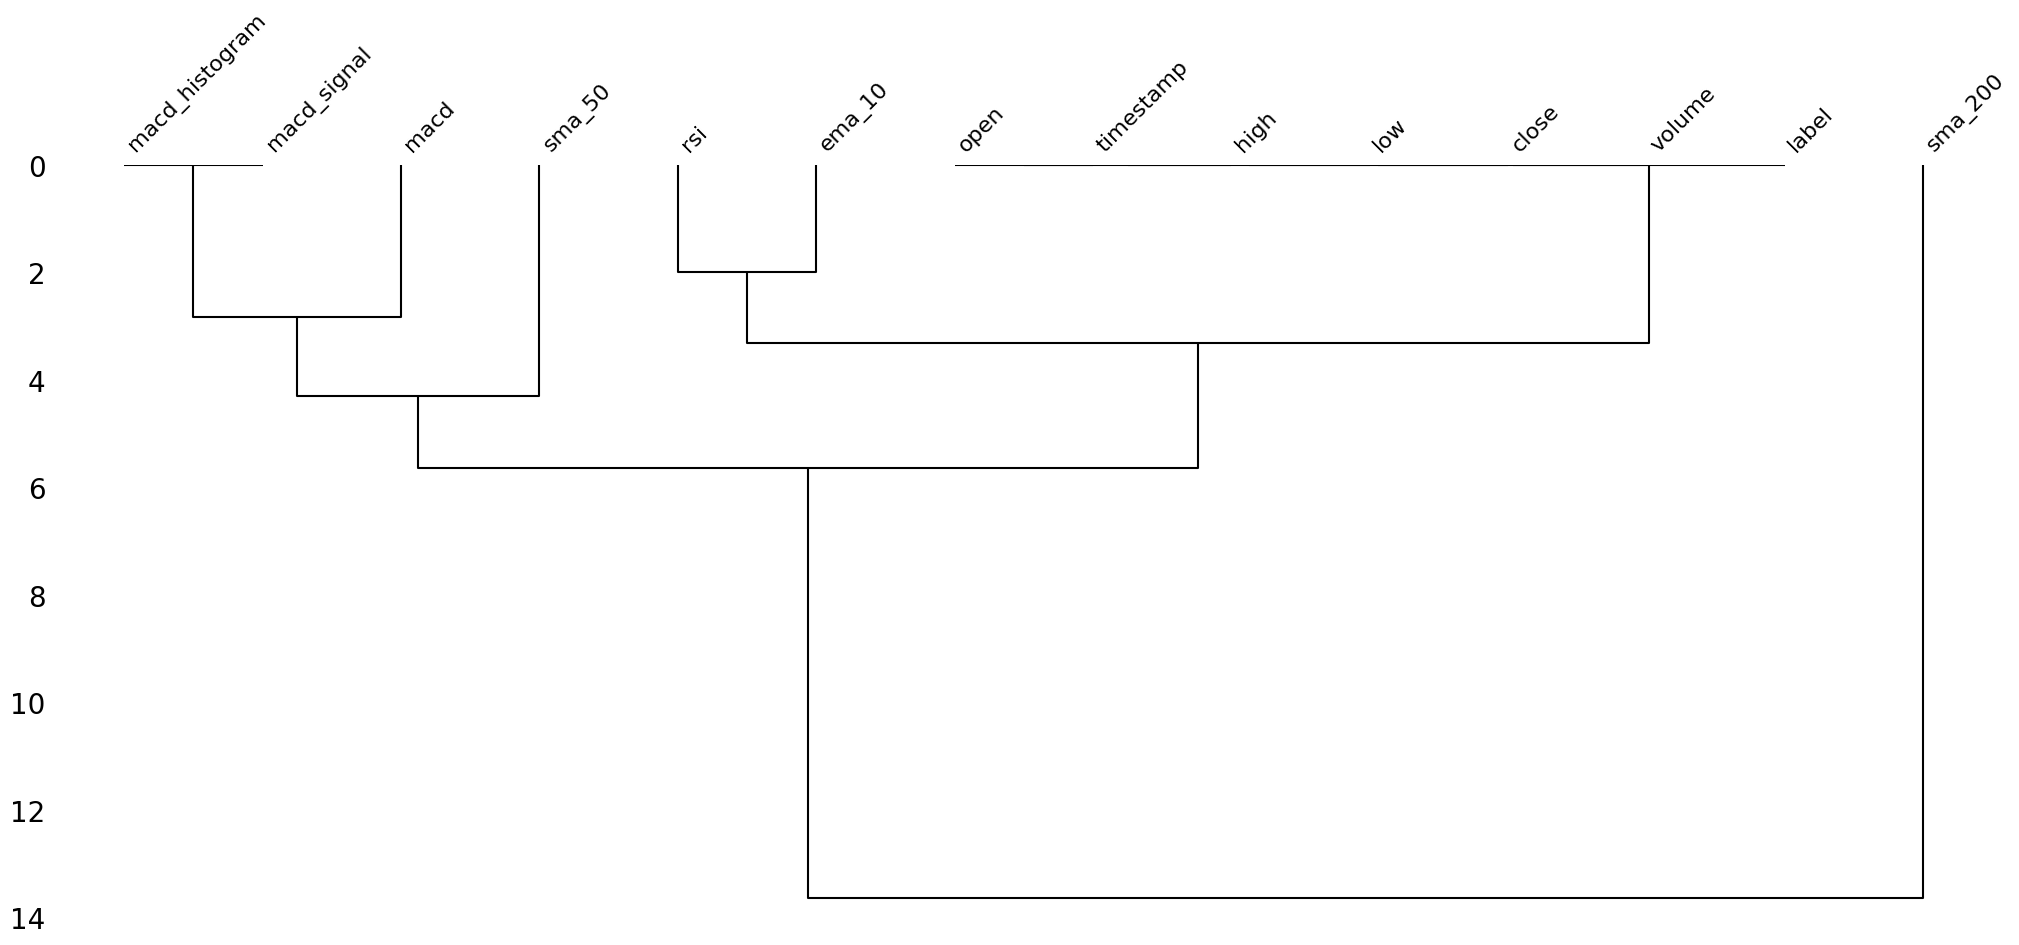

In [154]:
msno.dendrogram(df)

##### When collectin the data from Binance, we get open, timestamp, high, low, close, volume. 
##### We compute the indicators sma_50, sma_200, ema_10, rsi, macd, macd_signal, macd_histogram. Based on the values from binance
##### Label is being created based on (df["sma_50"] > df["sma_200"]) & (df["rsi"] > 50).

##### How this works from 1000 registers we calculate sma_200 based on 200 values. Thats why there are only 801 rows that has sma_200, is the same to sma_50 = 951, ema_10 = 991, rsi = 987

In [155]:
## Dropping na, i think is not necessary to use the mean to replace na
df.dropna(inplace=True)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 801 entries, 199 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       801 non-null    datetime64[ns]
 1   open            801 non-null    float64       
 2   high            801 non-null    float64       
 3   low             801 non-null    float64       
 4   close           801 non-null    float64       
 5   volume          801 non-null    float64       
 6   sma_50          801 non-null    float64       
 7   sma_200         801 non-null    float64       
 8   ema_10          801 non-null    float64       
 9   rsi             801 non-null    float64       
 10  macd            801 non-null    float64       
 11  macd_signal     801 non-null    float64       
 12  macd_histogram  801 non-null    float64       
 13  label           801 non-null    int64         
dtypes: datetime64[ns](1), float64(12), int64(1)
memory usage: 93.

### Duplicate values

In [157]:
df.duplicated().sum()

np.int64(0)

#### No checking for Inconsistent Data based, no necessary

### Checking outliers

In [158]:
def plot_individual_boxplots(df):
    # Check if the DataFrame contains numeric columns
    numeric_columns = df.select_dtypes(include=['number']).columns
    
    if len(numeric_columns) == 0:
        print("No numeric columns available for boxplot.")
        return
    
    # Plot individual boxplots for each numeric column
    for column in numeric_columns:
        plt.figure(figsize=(6, 4))  # Set the figure size for each plot
        sns.boxplot(x=df[column])
        plt.title(f"Boxplot of {column}")
        plt.show()

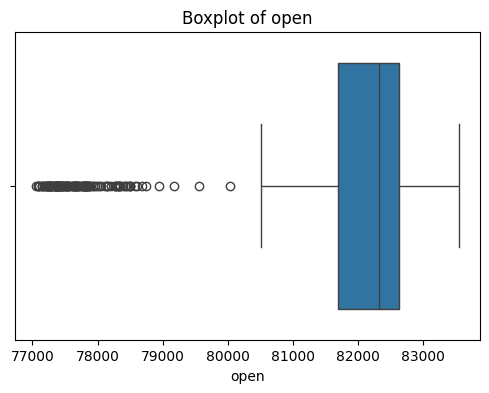

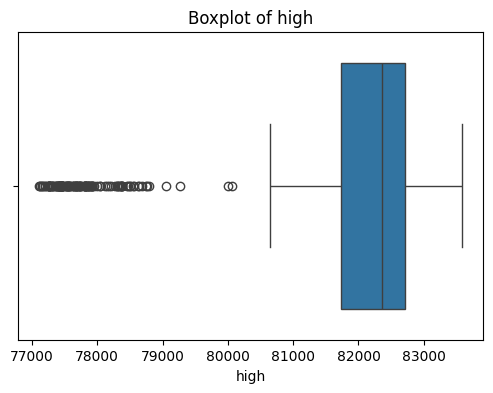

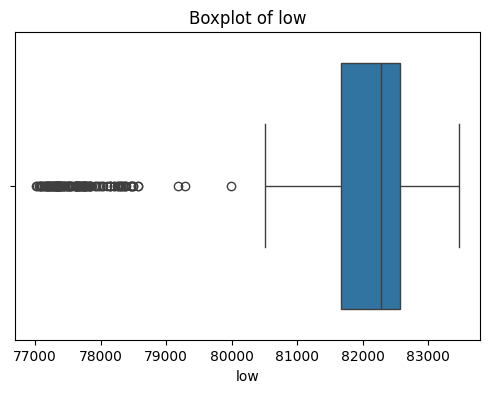

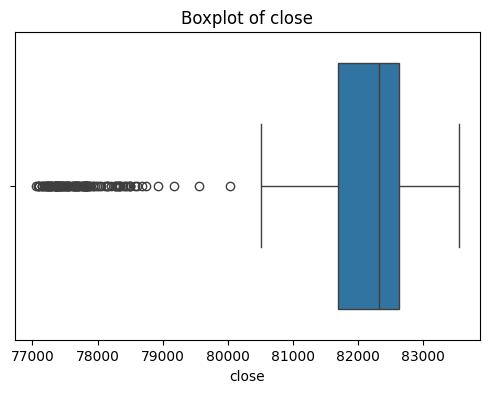

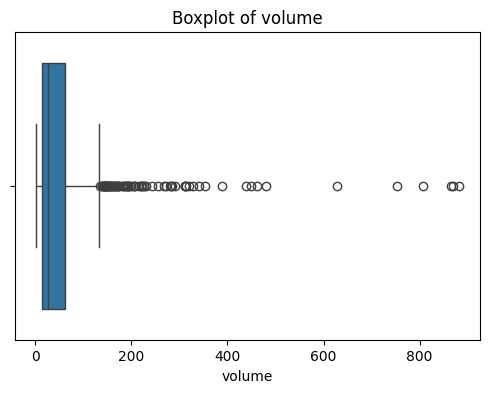

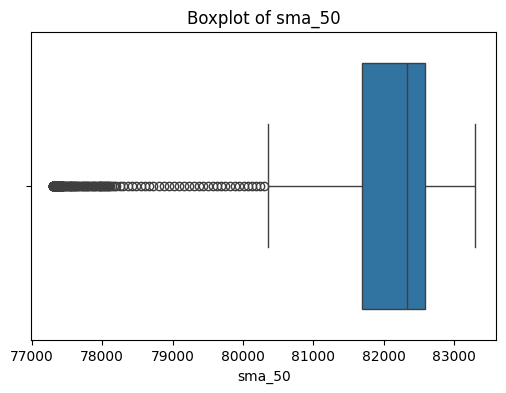

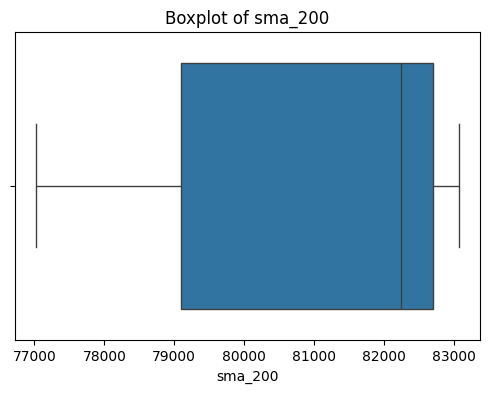

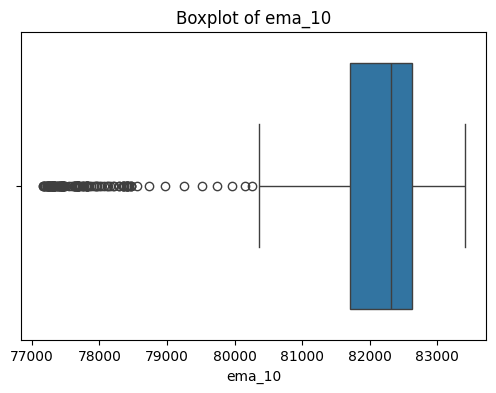

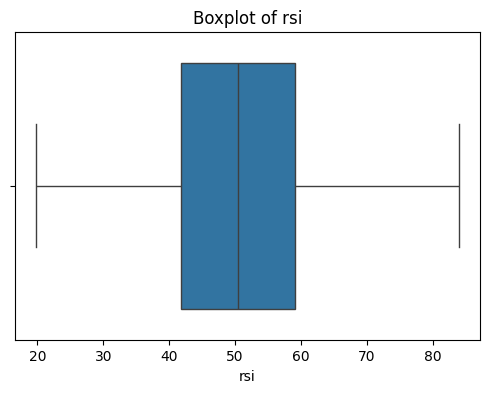

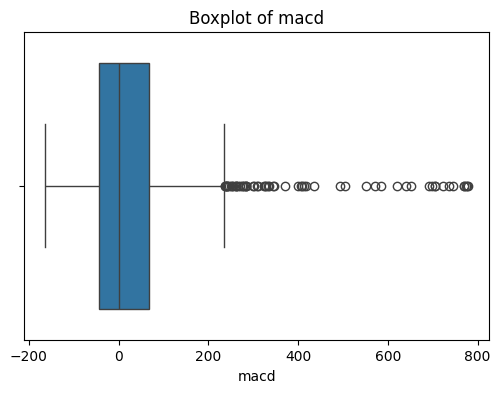

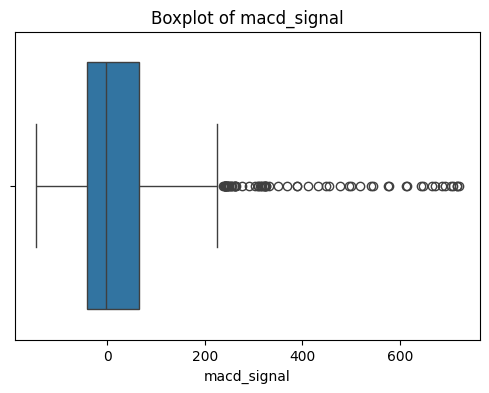

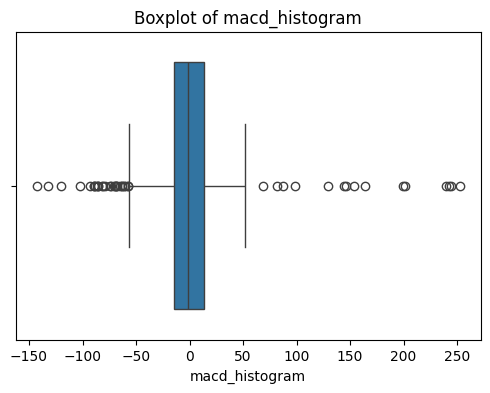

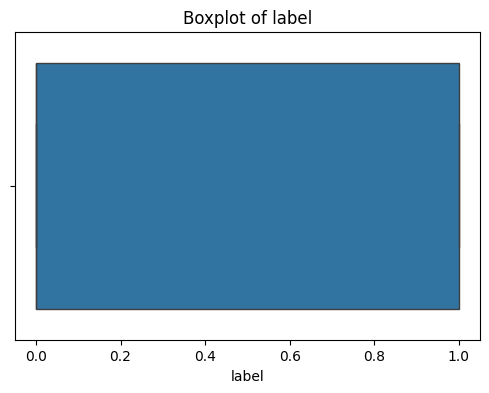

In [159]:
plot_individual_boxplots(df)

#### Imputing outliers using the IQR method and setting the mean

In [160]:
def handle_outliers_iqr(df):
    # Check if the DataFrame contains numeric columns
    numeric_columns = df.select_dtypes(include=['number']).columns
    
    if len(numeric_columns) == 0:
        print("No numeric columns available for outlier handling.")
        return df
    
    # Handle outliers using the IQR method and impute with the mean
    for column in numeric_columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
        
        # Impute outliers with the column mean
        mean_value = df[column].mean()
        df[column] = df[column].where(~outliers, mean_value)
    
    return df

In [161]:
df = handle_outliers_iqr(df)

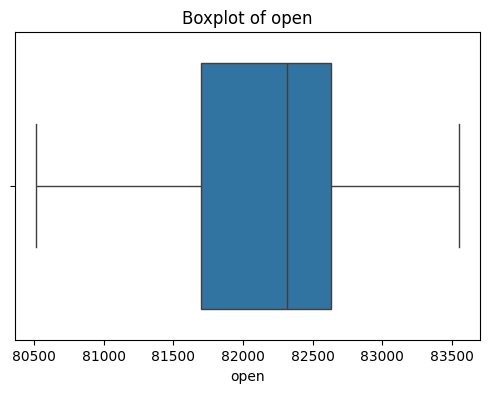

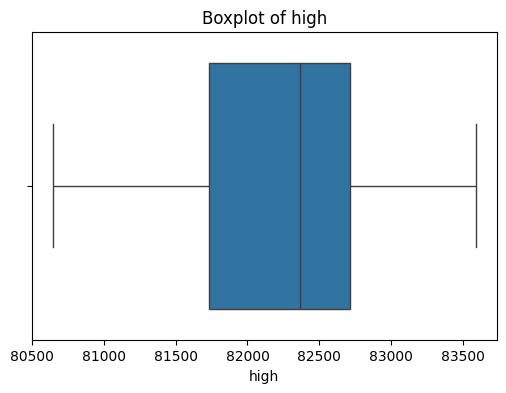

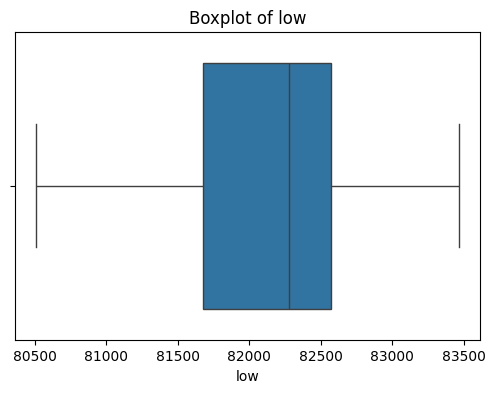

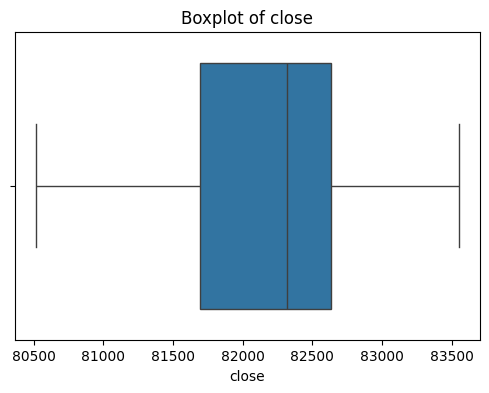

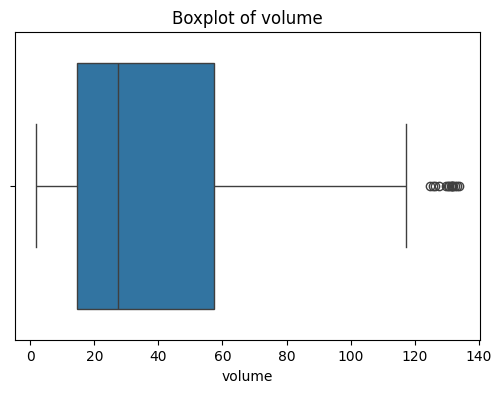

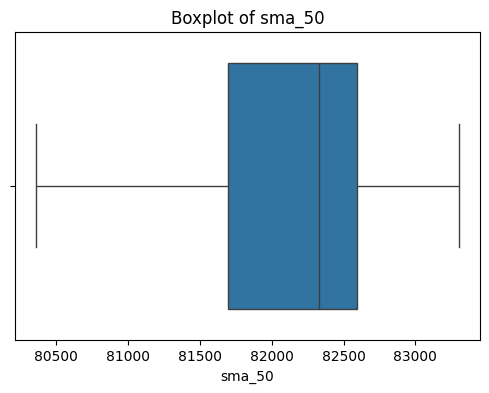

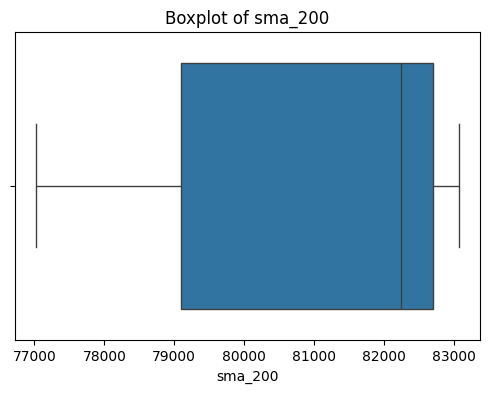

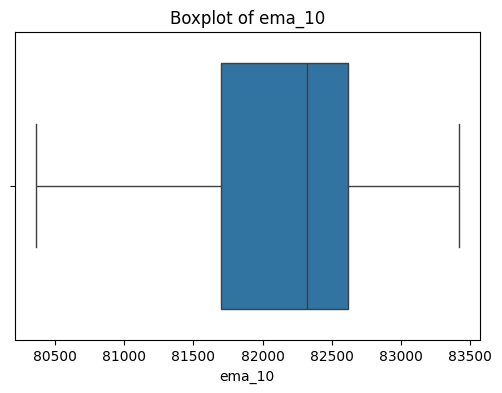

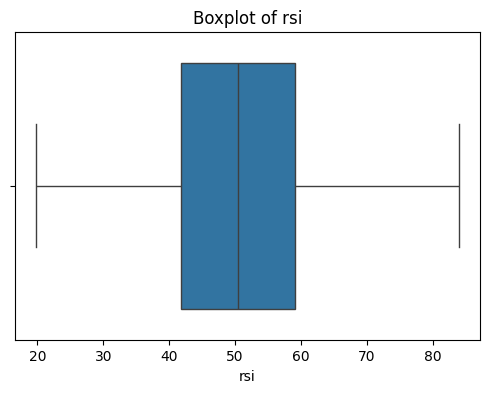

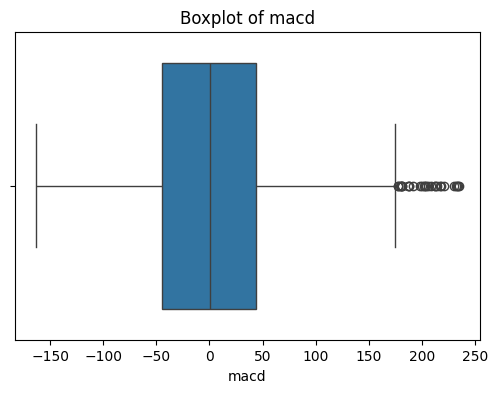

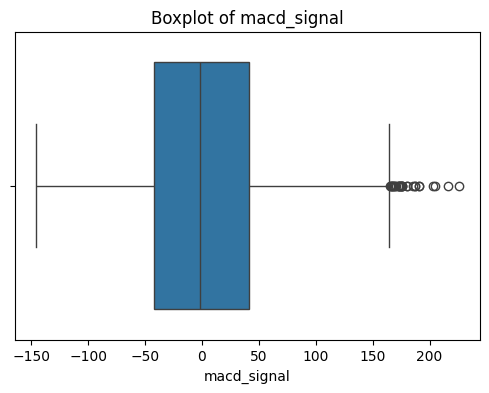

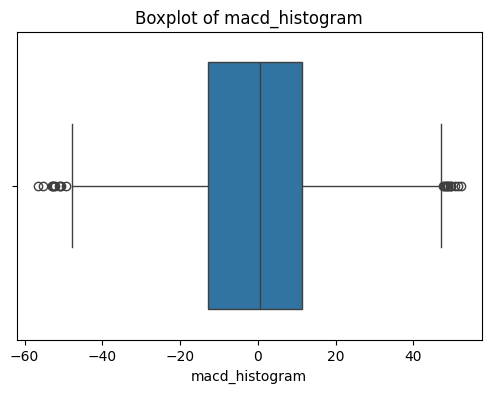

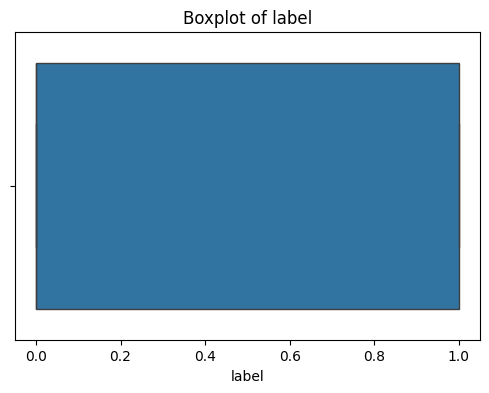

In [162]:
plot_individual_boxplots(df)

### Check data types

In [163]:
df.dtypes

timestamp         datetime64[ns]
open                     float64
high                     float64
low                      float64
close                    float64
volume                   float64
sma_50                   float64
sma_200                  float64
ema_10                   float64
rsi                      float64
macd                     float64
macd_signal              float64
macd_histogram           float64
label                      int64
dtype: object

##### No incorrect data types

### No need to encoding categorical variables